# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# read the data
url = 'https://raw.githubusercontent.com/LarryHu208/MIT-AI-applied/main/CodingProject1/foodhub_order.csv'
df = pd.read_csv(url)
# returns the first 5 rows
display(df.head())

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here

In [ ]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 1898
Number of columns: 9


#### Observations:
There are 1898 Rows and 9 Columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Data types are as follows:
0   order_id                int64  

 1   customer_id           int64  
 2   restaurant_name       object
 3   cuisine_type          object
 4   cost_of_the_order     float64
 5   day_of_the_week       object
 6   rating                object
 7   food_preparation_time int64  
 8   delivery_time         int64  


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Check for missing values
print("Missing values before treatment:")
print(df.isnull().sum())

Missing values before treatment:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [ ]:
# Write your code here

#### Observations:
There are no missing values

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Check the statistical summary of the data
display(df.describe())

# Get the minimum, average, and maximum food preparation time
min_prep_time = df['food_preparation_time'].min()
mean_prep_time = df['food_preparation_time'].mean()
max_prep_time = df['food_preparation_time'].max()

print(f"\nMinimum food preparation time: {min_prep_time} minutes")
print(f"Average food preparation time: {mean_prep_time:.2f} minutes")
print(f"Maximum food preparation time: {max_prep_time} minutes")

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000



Minimum food preparation time: 20 minutes
Average food preparation time: 27.37 minutes
Maximum food preparation time: 35 minutes


#### Observations:
Minimum is 20 minutes,
Average is 27.37 minutes
Max is 35 Minutes



### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Count the number of orders where the rating is 'Not given'
not_rated_orders = df[df['rating'] == 'Not given'].shape[0]

print(f"Number of orders that are not rated: {not_rated_orders}")

Number of orders that are not rated: 736


#### Observations:
There are a total of 736 orders not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Distribution of cost_of_the_order:


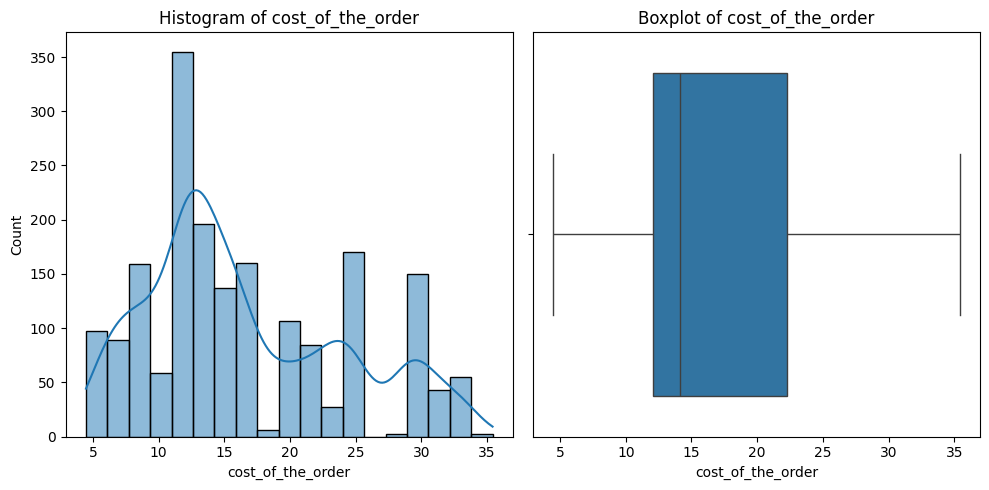

Distribution of food_preparation_time:


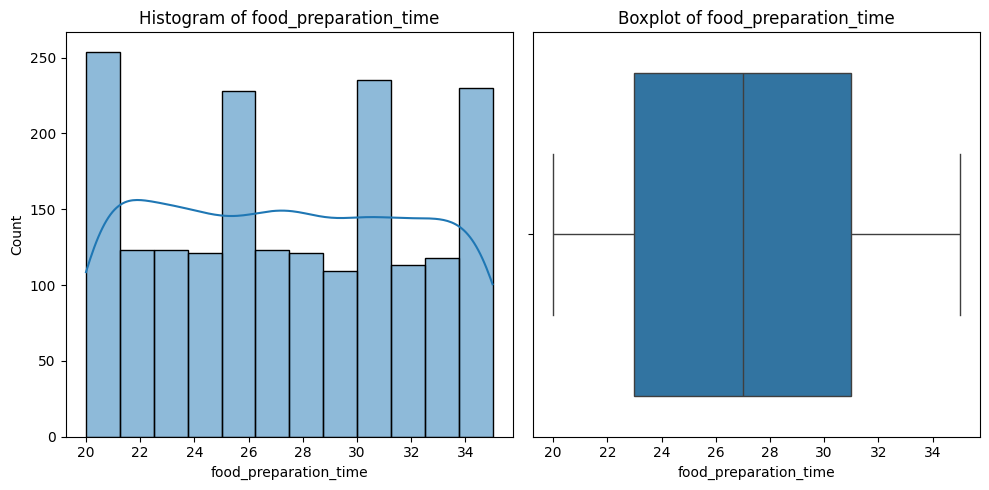

Distribution of delivery_time:


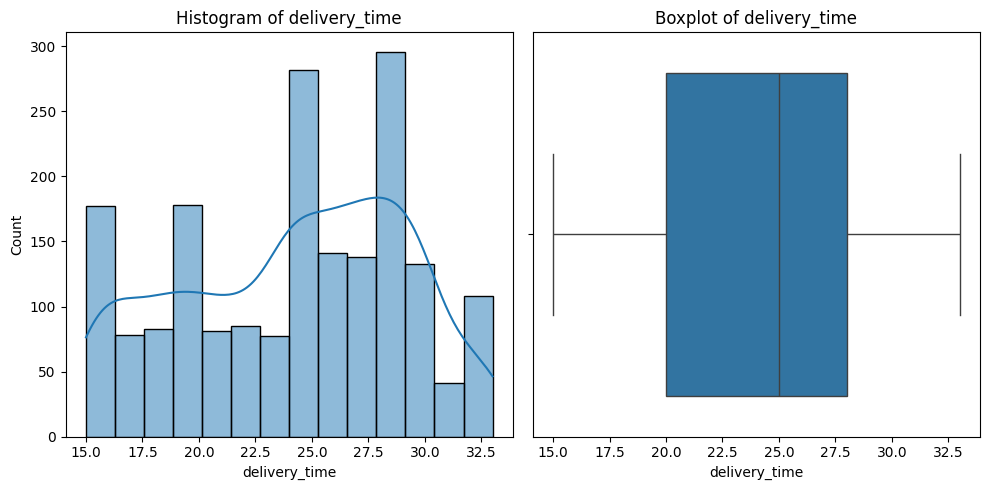

In [ ]:
# Explore distribution of numerical variables
numerical_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

for col in numerical_cols:
    print(f"Distribution of {col}:")
    plt.figure(figsize=(10, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

Distribution of restaurant_name:


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


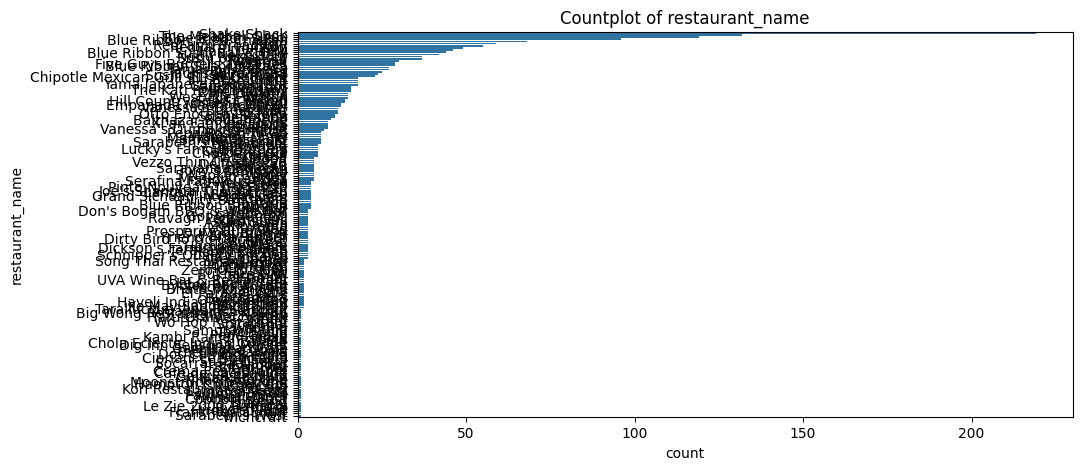

Distribution of cuisine_type:


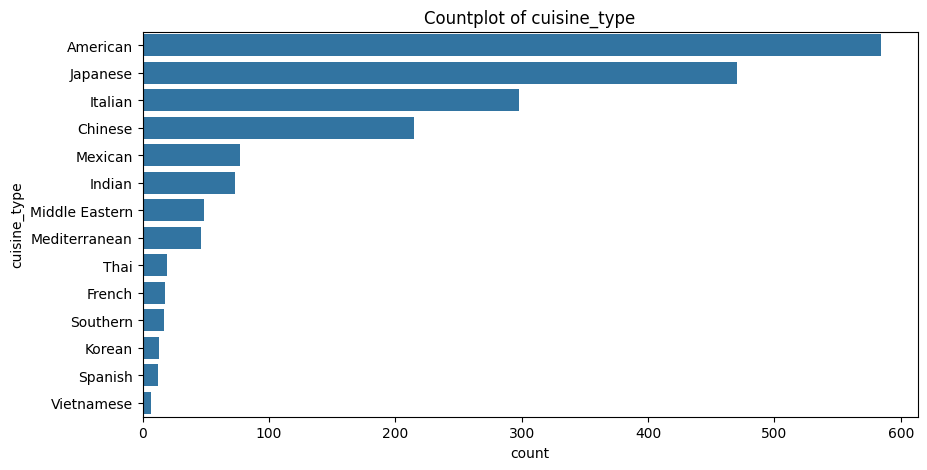

Distribution of day_of_the_week:


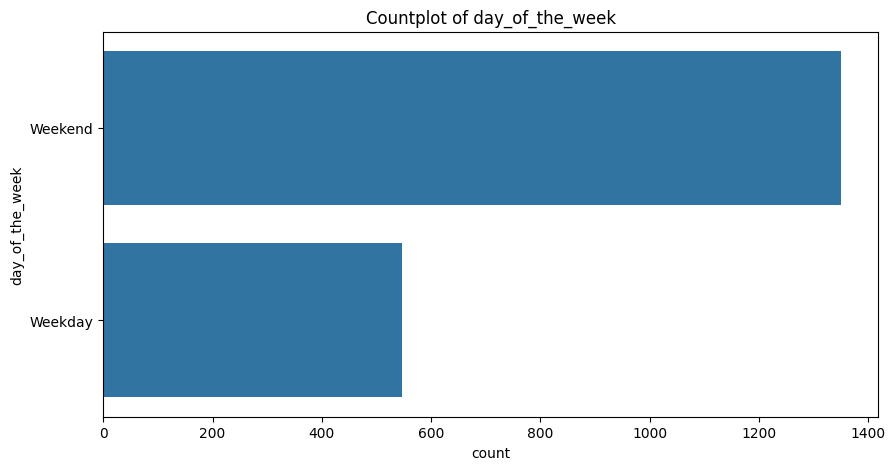

Distribution of rating:


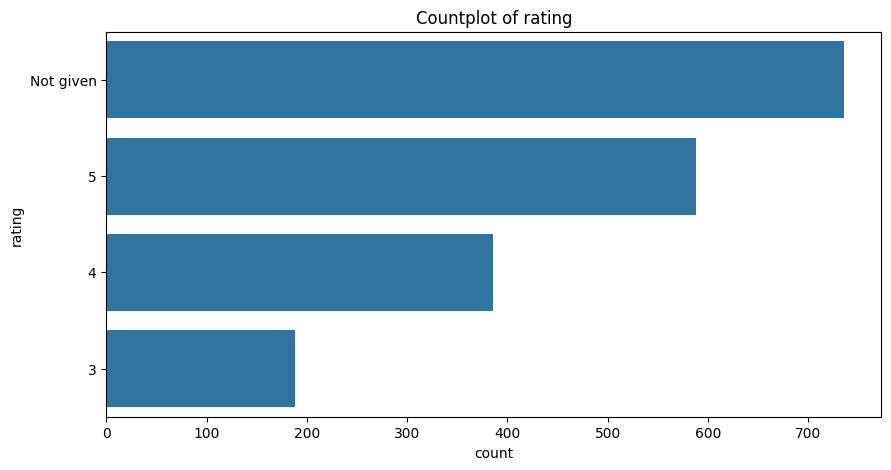

In [ ]:
# Explore distribution of categorical variables
categorical_cols = ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']

for col in categorical_cols:
    print(f"Distribution of {col}:")
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, y=col, order = df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Get the top 5 restaurants with the most orders
top_5_restaurants = df['restaurant_name'].value_counts().head(5)

print("Top 5 restaurants by number of orders:")
display(top_5_restaurants)

Top 5 restaurants by number of orders:


,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
Top 5 restaurants are Shack Shack, The Meatball Shop, Blue Ribbon SUshi, Blue Ribbon Fried Chicken and Parm

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Filter data for weekend orders
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Get the most popular cuisine on weekends
most_popular_cuisine_weekend = weekend_orders['cuisine_type'].value_counts().index[0]

print(f"The most popular cuisine on weekends is: {most_popular_cuisine_weekend}")

The most popular cuisine on weekends is: American


#### Observations:
Most popular cuisine on weekends is American

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Calculate the number of orders that cost more than 20 dollars
orders_over_20 = df[df['cost_of_the_order'] > 20].shape[0]

# Calculate the total number of orders
total_orders = df.shape[0]

# Calculate the percentage of orders that cost more than 20 dollars
percentage_over_20 = (orders_over_20 / total_orders) * 100

print(f"Percentage of orders that cost more than 20 dollars: {percentage_over_20:.2f}%")

Percentage of orders that cost more than 20 dollars: 29.24%


#### Observations:
Percentage of orders costt more than 20 dollars are 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
mean_delivery_time = df['delivery_time'].mean()
mean_delivery_time

np.float64(24.161749209694417)

#### Observations:
The mean delivery time is 24.16 Minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Find the top 3 most frequent customers
top_3_customers = df['customer_id'].value_counts().head(3)

print("Top 3 most frequent customers and their order counts:")
display(top_3_customers)

Top 3 most frequent customers and their order counts:


,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
Top 3 customers are 52832, 47440, 83287

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Correlation Matrix of Numerical Variables:


,cost_of_the_order,food_preparation_time,delivery_time
cost_of_the_order,1.000000,0.041527,-0.029949
food_preparation_time,0.041527,1.000000,0.011094
delivery_time,-0.029949,0.011094,1.000000


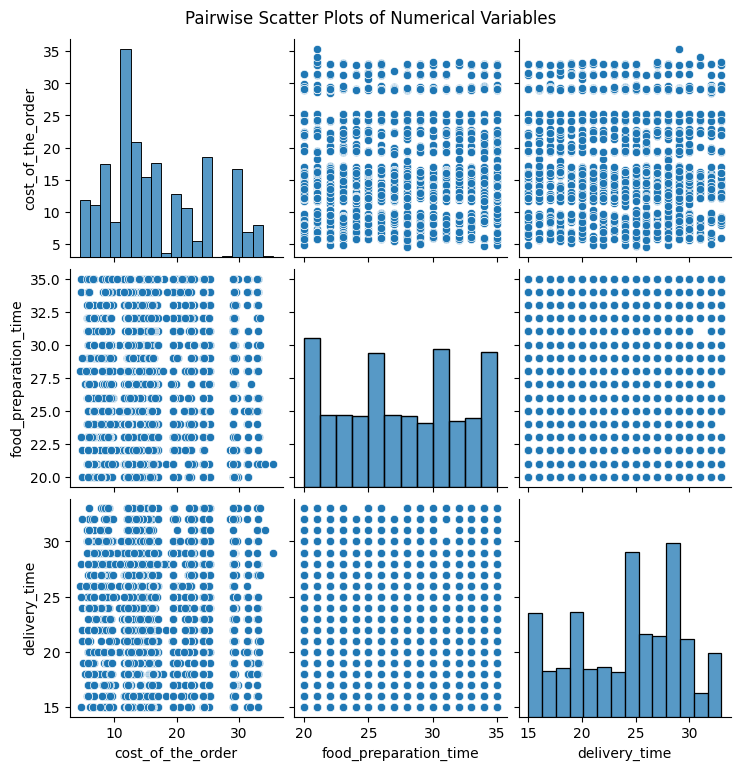

In [ ]:
# Explore relationships between numerical variables
numerical_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

# Correlation matrix
print("Correlation Matrix of Numerical Variables:")
display(df[numerical_cols].corr())

# Scatter plots
sns.pairplot(df[numerical_cols])
plt.suptitle('Pairwise Scatter Plots of Numerical Variables', y=1.02)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here

Relationship between cost_of_the_order and cuisine_type:


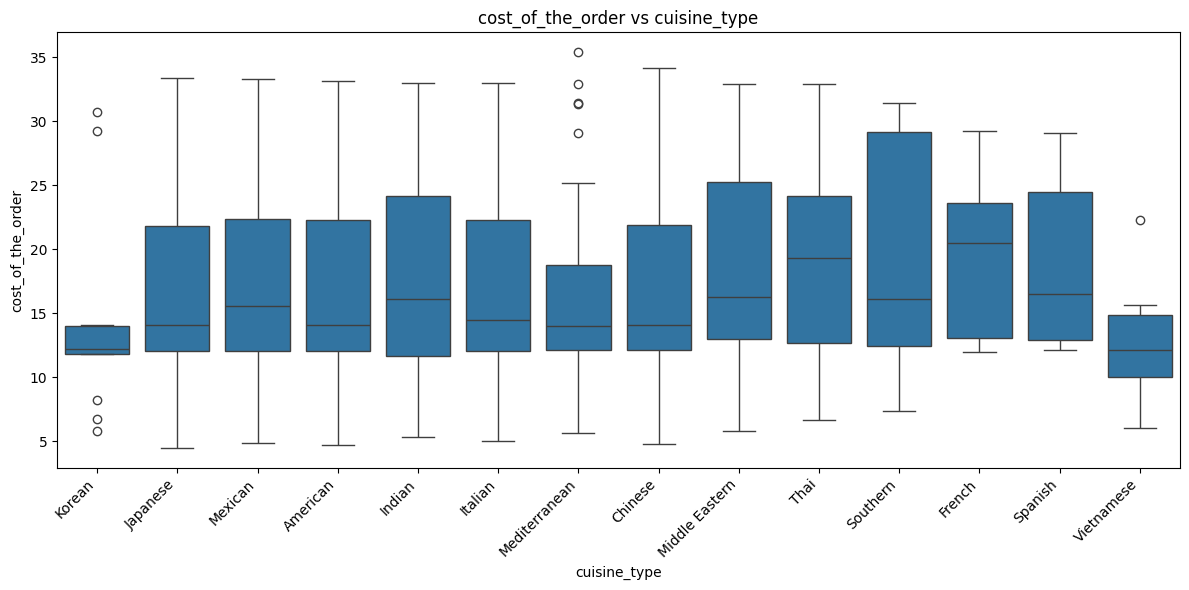

Relationship between cost_of_the_order and day_of_the_week:


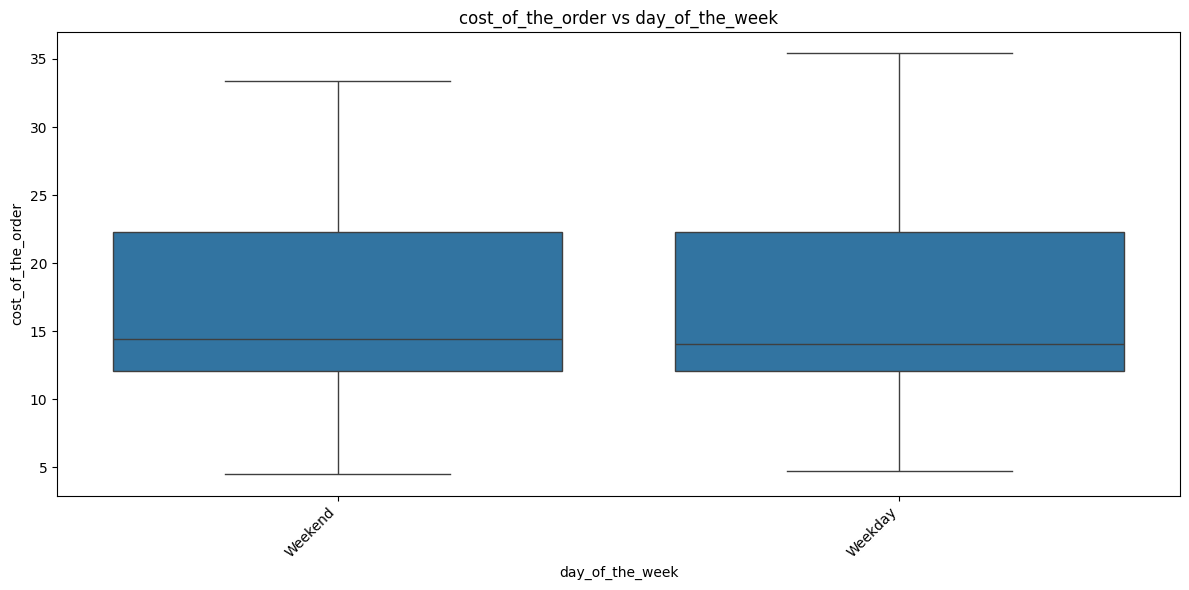

Relationship between cost_of_the_order and rating:


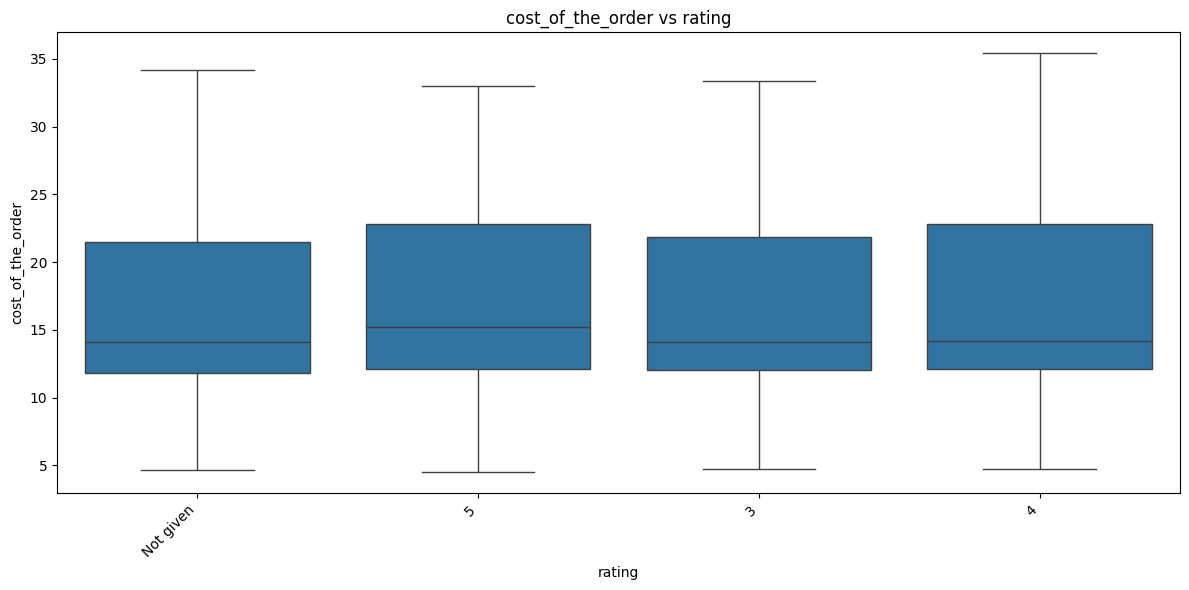

Relationship between food_preparation_time and cuisine_type:


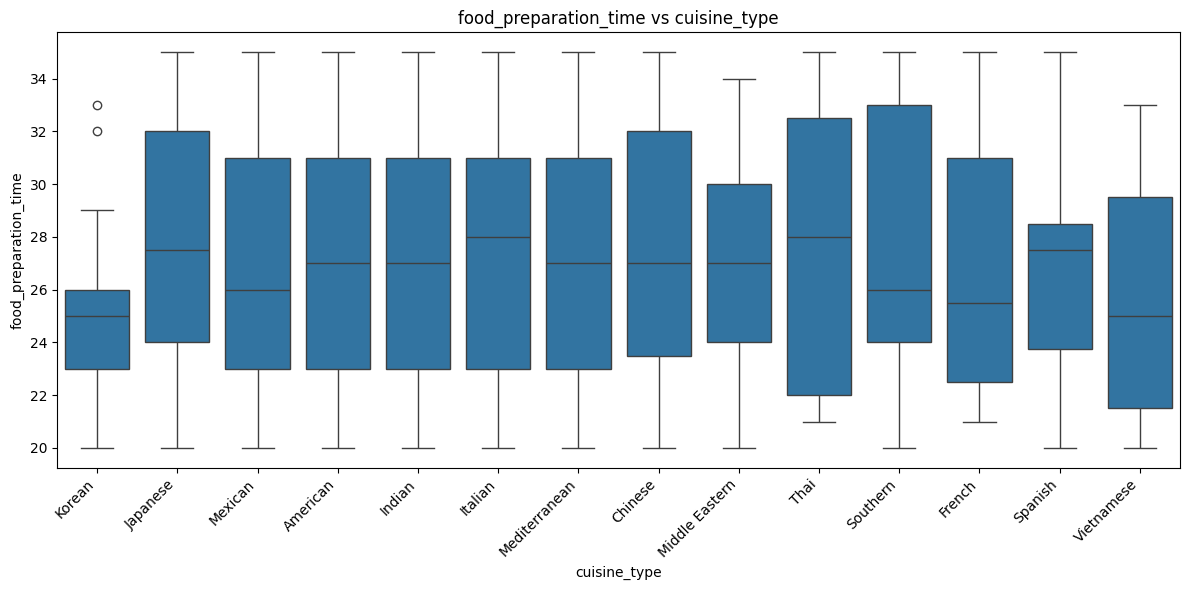

Relationship between food_preparation_time and day_of_the_week:


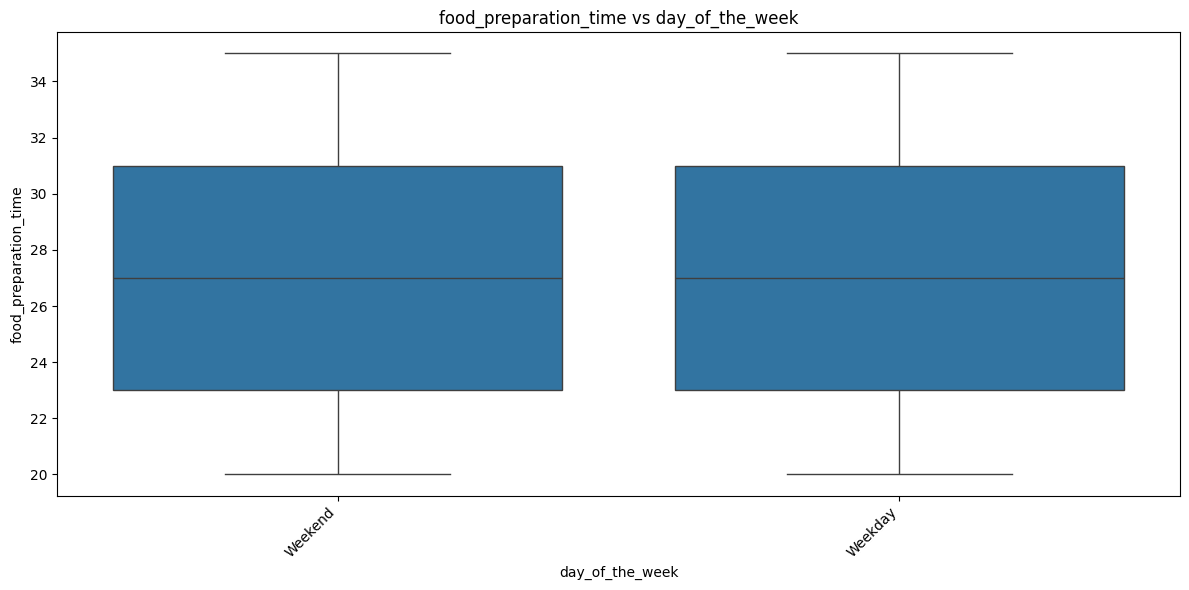

Relationship between food_preparation_time and rating:


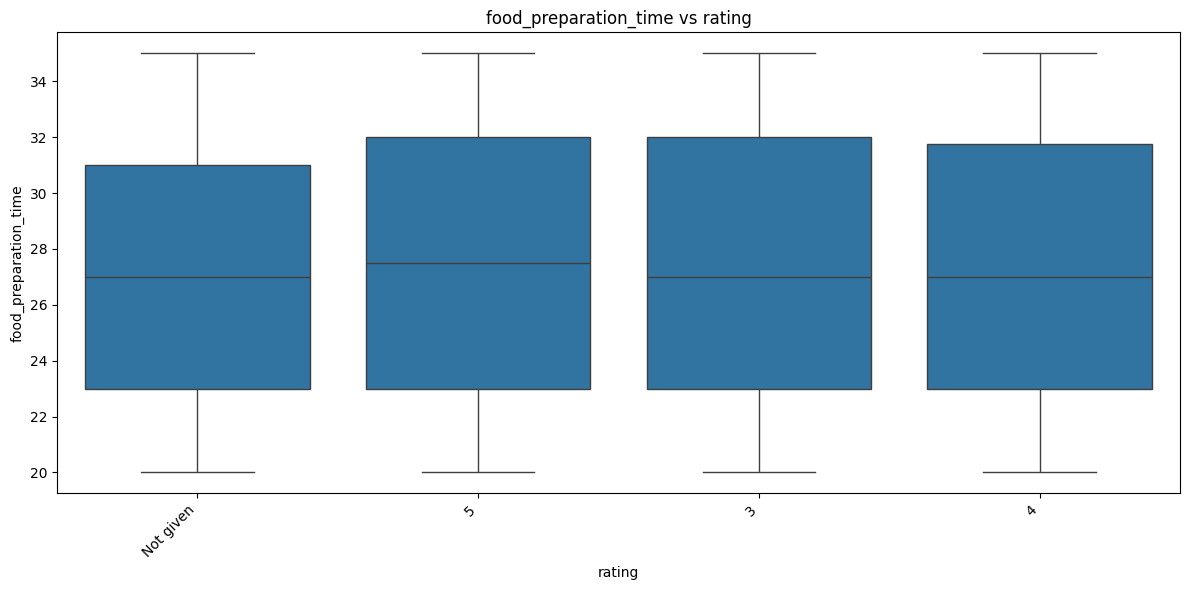

Relationship between delivery_time and cuisine_type:


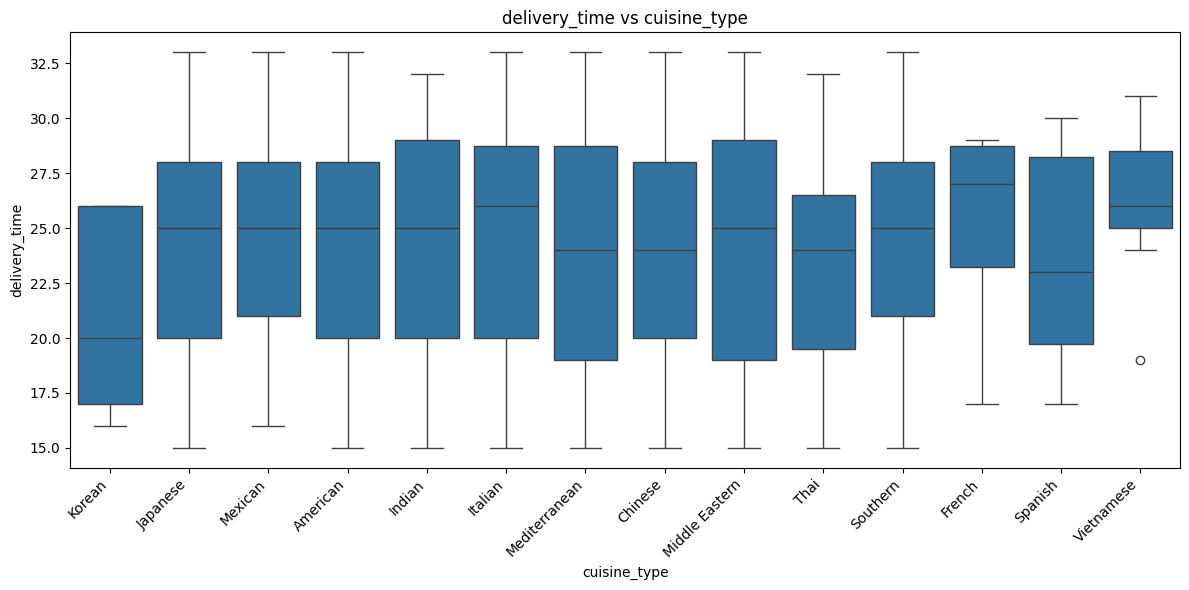

Relationship between delivery_time and day_of_the_week:


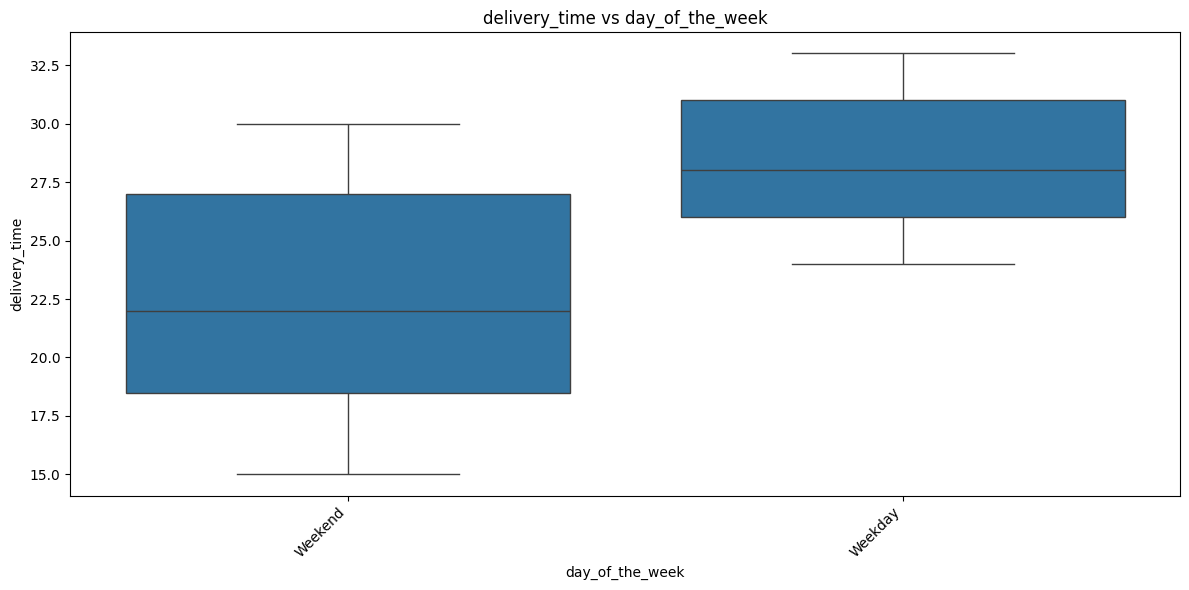

Relationship between delivery_time and rating:


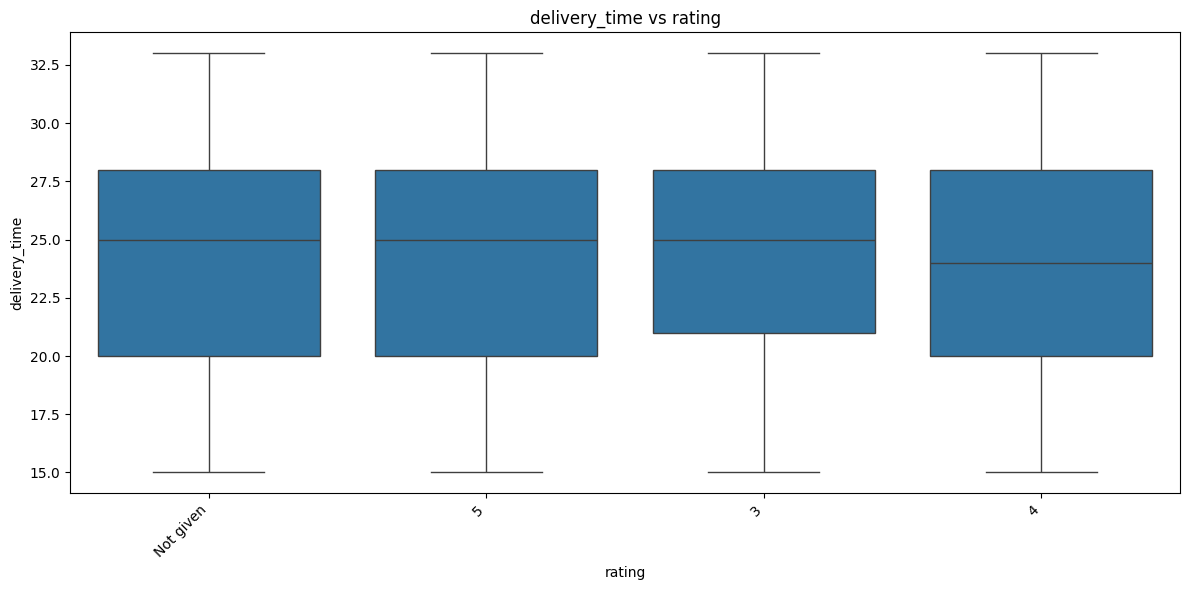

In [ ]:
# Explore relationships between numerical and categorical variables
numerical_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
categorical_cols = ['cuisine_type', 'day_of_the_week', 'rating']

for num_col in numerical_cols:
    for cat_col in categorical_cols:
        print(f"Relationship between {num_col} and {cat_col}:")
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x=cat_col, y=num_col)
        plt.title(f'{num_col} vs {cat_col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

#### Observations:
Restaurants with above a 4 star are:
Blue Ribbon Fried Chicken with 4.33
Blue Ribbon Sushi with 4.22
Shake Shack at 4.28
The Meat Ball Shop at 4.51


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Calculate revenue for orders > $20
revenue_over_20 = df[df['cost_of_the_order'] > 20]['cost_of_the_order'] * 0.25

# Calculate revenue for orders > $5 and <= $20
revenue_5_to_20 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'] * 0.15

# Calculate total revenue
total_revenue = revenue_over_20.sum() + revenue_5_to_20.sum()

print(f"Net revenue generated by the company: ${total_revenue:.2f}")

Net revenue generated by the company: $6166.30


#### Observations:

Net revenue generated by company across orders with revenue over 20 adn 5 to 20 is 6166.30



### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate the total delivery time for each order
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Count the number of orders that take more than 60 minutes
orders_over_60_minutes = df[df['total_delivery_time'] > 60].shape[0]

# Calculate the total number of orders
total_orders = df.shape[0]

# Calculate the percentage of orders that take more than 60 minutes
percentage_over_60_minutes = (orders_over_60_minutes / total_orders) * 100

print(f"Percentage of orders that take more than 60 minutes to get delivered: {percentage_over_60_minutes:.2f}%")

Percentage of orders that take more than 60 minutes to get delivered: 10.54%


#### Observations:
Percentage of orders that take more than 60 is 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Calculate the mean delivery time for weekdays and weekends
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()

print("Mean delivery time during weekdays and weekends:")
display(mean_delivery_time_by_day)

Mean delivery time during weekdays and weekends:


,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
Weekday average delivery time is 28.34 min
Weekend is 22.47 min

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:


*   The average food preparation time is around 27.37 minutes, and the average delivery time is around 24.16 minutes.
*   A significant number of orders (736) were not rated.
*   Shake Shack is the most popular restaurant in terms of the number of orders and also generates the highest revenue.
*   American cuisine is the most popular on weekends.
*   Approximately 29.24% of orders cost more than 20 dollars.
*   The mean delivery time is higher on weekdays (around 28 minutes) compared to weekends (around 22 minutes).
*   The total time for delivery (preparation + delivery) takes more than 60 minutes for about 10.54% of the orders.
*   The top 3 most frequent customers are IDs 52832, 47440, and 83287.
*   There is no strong correlation between numerical variables like cost of order, food preparation time, and delivery time.
*   Restaurants with a rating count of more than 50 and an average rating greater than 4 are The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack, and Blue Ribbon Sushi.

### Recommendations:

*  ### Recommendations:

*   **Address Unrated Orders:** Investigate why a large number of orders are not being rated. Implement strategies to encourage customers to provide feedback, such as in-app reminders or small incentives. Understanding customer satisfaction levels is crucial for improvement.
*   **Optimize Weekday Delivery:** Since weekday delivery times are significantly higher, explore ways to optimize delivery routes or consider increasing the number of delivery personnel during peak weekday hours to reduce delivery times.
*   **Promote Top-Rated Restaurants:** Leverage the information about restaurants with high ratings and order counts (Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken) in promotional campaigns to attract more customers. Highlighting their popularity and quality can be a strong selling point.
*   **Analyze Customer Behavior:** Further analyze the behavior of the top 3 most frequent customers to understand their preferences and potentially offer personalized promotions or loyalty programs to retain them.
*   **Investigate Longer Delivery Times:** Analyze the orders that take more than 60 minutes for total delivery. Identify potential bottlenecks in the food preparation or delivery process for these orders and work with restaurants and delivery personnel to reduce these times.

---

In [30]:
!jupyter nbconvert --execute --to html "/content/PYF_Project_LearnerNotebook_FullCode.ipynb" --output "PYF_Project_LearnerNotebook_FullCode.html"


[NbConvertApp] WARNING | pattern '/content/PYF_Project_LearnerNotebook_FullCode.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--Jupyter